In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_histogram_diff(frame1, frame2):
    hist1 = cv2.calcHist([frame1], [0], None, [256], [0,256])
    hist2 = cv2.calcHist([frame2], [0], None, [256], [0,256])
    hist_diff = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)
    return hist_diff

def calculate_threshold(hist_diff_values):
    mean = np.mean(hist_diff_values)
    std_dev = np.std(hist_diff_values)
    threshold = mean + (2 * std_dev) # Example threshold calculation, you may adjust it according to your requirement
    return threshold

def calculate_euclidean_distance(frame1, frame2):
    return np.linalg.norm(frame1 - frame2)

def key_frame_extraction(video_path):
    cap = cv2.VideoCapture(video_path)
    hist_diff_values = []
    fkey = []

    # Read the first frame
    ret, prev_frame = cap.read()
    prev_frame_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)

    while True:
        ret, current_frame = cap.read()
        if not ret:
            break

        current_frame_gray = cv2.cvtColor(current_frame, cv2.COLOR_BGR2GRAY)
        
        # Compute histogram difference
        hist_diff = compute_histogram_diff(prev_frame_gray, current_frame_gray)
        hist_diff_values.append(hist_diff)

        # Calculate Euclidean distance
        euclidean_distance = calculate_euclidean_distance(prev_frame_gray, current_frame_gray)

        # Calculate threshold
        threshold = calculate_threshold(hist_diff_values)

        #if euclidean_distance > threshold:
            # Add the frame to key-frame set
        fkey.append(current_frame)

        # Update for the next iteration
        prev_frame_gray = current_frame_gray

    cap.release()
    cv2.destroyAllWindows()

    return fkey

# Example usage
video_path = 'videos/accident/00634.mp4'
fkey = key_frame_extraction(video_path)
print("Number of key frames extracted:", len(fkey))


Number of key frames extracted: 39


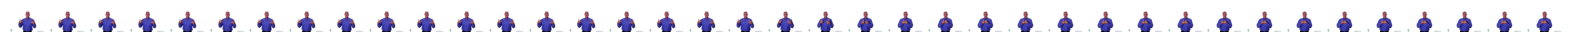

In [16]:
num_key_frames = len(fkey)
fig, axes = plt.subplots(1, num_key_frames, figsize=(20, 50))

for i in range(num_key_frames):
    axes[i].imshow(cv2.cvtColor(fkey[i], cv2.COLOR_BGR2RGB))
    axes[i].axis('off')

plt.show()